In [5]:
!pip install tabulate

In [6]:
import matplotlib.pyplot as plt
import joblib
from tabulate import tabulate


In [7]:
GUARD_NODES_FILE = 'guard_nodes.joblib'
#GUARD_NODES_FILE = 'guard_nodes copy.joblib'

### Load files

In [8]:
guard_nodes = joblib.load(GUARD_NODES_FILE)

### Plot guard probability per ISP, AS and country

In [9]:
isps_count = {}
ases_count = {}
isps_countries = {}
ases_countries = {}
country_codes_count = {}
total_iterations = 0

In [10]:
def count_occurences():
    global total_iterations
    
    for key, value in guard_nodes.items():
        isp = value["isp"]
        as_name = value["as"]
        country_code = value["country_code"]

        if isp not in isps_count:
            isps_count[isp] = 0
        isps_count[isp] += value["count"]

        if as_name not in ases_count:
            ases_count[as_name] = 0
        ases_count[as_name] += value["count"]

        if country_code not in country_codes_count:
            country_codes_count[country_code] = 0
        country_codes_count[country_code] += value["count"]

        if isp not in isps_countries:
            isps_countries[isp] = set()
        isps_countries[isp].add(country_code)

        if as_name not in ases_countries:
            ases_countries[as_name] = set()
        ases_countries[as_name].add(country_code)

        total_iterations += value["count"]

count_occurences()
print("\nisps_count", isps_count)
print("\nases_count", ases_count)
print("\ncountries_count", country_codes_count)
print("\nisps_countries", isps_countries)
print("\nases_countries", ases_countries)
print("\ntotal_iterations", total_iterations)


isps_count {'OVH ISP': 1}

ases_count {'AS16276 OVH SAS': 1}

countries_count {'PT': 1}

isps_countries {'OVH ISP': {'PT'}}

ases_countries {'AS16276 OVH SAS': {'PT'}}

total_iterations 1


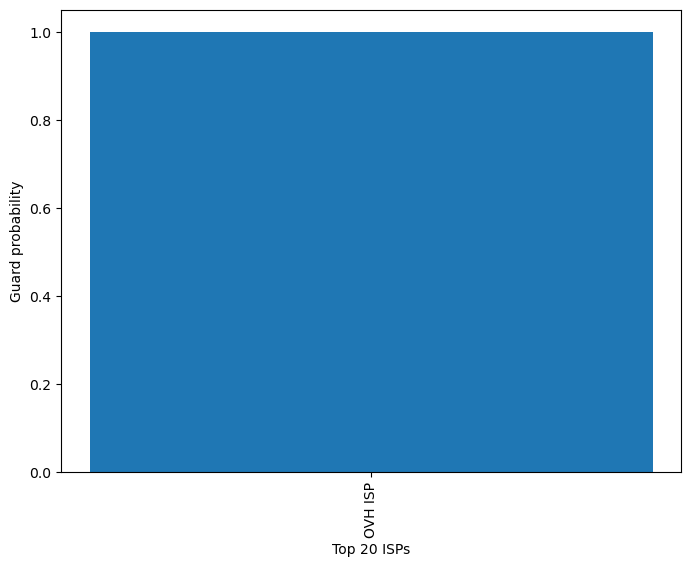

In [11]:
isp_guard_probabilities = {}

def plot_guard_probability_per_isp():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(isps_count.keys())
    total = sum(isps_count.values())
    lengths = [(s/total) for s in isps_count.values()]

    for key, prob in zip(keys, lengths):
        isp_guard_probabilities[key] = prob

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} ISPs')
    plt.ylabel('Guard probability')

    # Display the plot
    plt.show()

plot_guard_probability_per_isp()

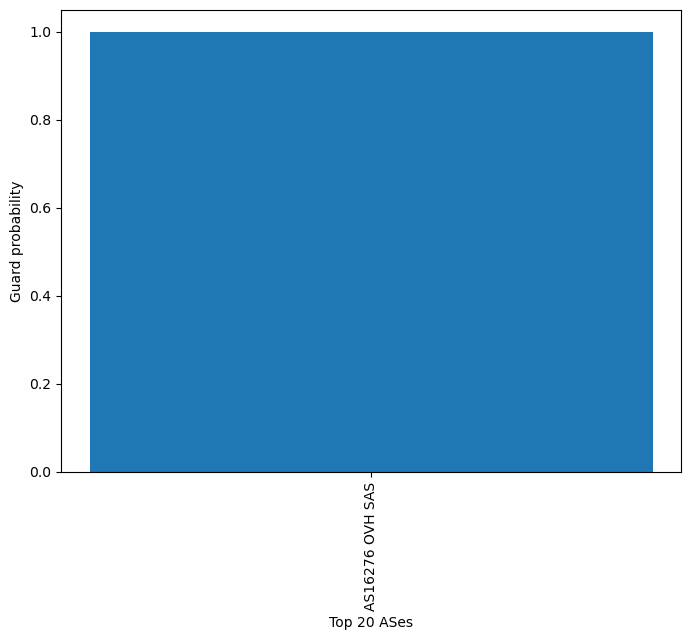

In [12]:
as_guard_probabilities = {}

def plot_guard_probability_per_as():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(ases_count.keys())
    total = sum(ases_count.values())
    lengths = [(s/total) for s in ases_count.values()]

    for key, prob in zip(keys, lengths):
        as_guard_probabilities[key] = prob

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} ASes')
    plt.ylabel('Guard probability')

    # Display the plot
    plt.show()

plot_guard_probability_per_as()

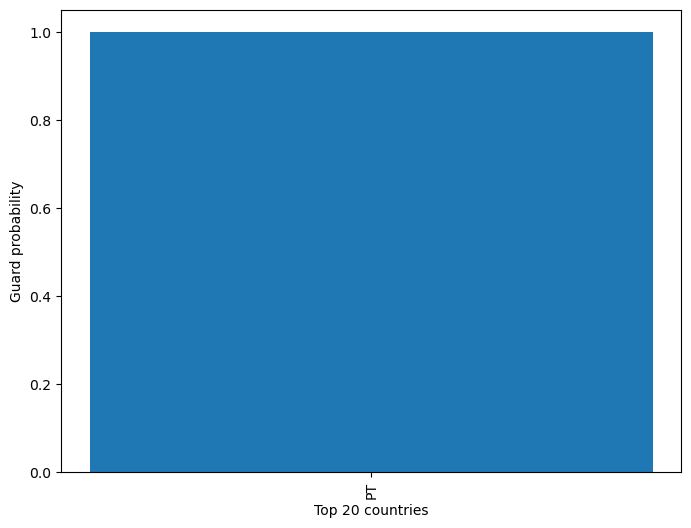

In [13]:
top_country_guard_probabilities = {}

def plot_guard_probability_per_country():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(country_codes_count.keys())
    total = sum(country_codes_count.values())
    lengths = [(s/total) for s in country_codes_count.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    for key, value in zip(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show]):
        top_country_guard_probabilities[key] = value

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} countries')
    plt.ylabel('Guard probability')

    # Display the plot
    plt.show()

plot_guard_probability_per_country()

In [14]:
eu_countries = [
    "AT",  # Austria
    "BE",  # Belgium
    "BG",  # Bulgaria
    "CY",  # Cyprus
    "CZ",  # Czech Republic
    "DE",  # Germany
    "DK",  # Denmark
    "EE",  # Estonia
    "ES",  # Spain
    "FI",  # Finland
    "FR",  # France
    "GR",  # Greece
    "HR",  # Croatia
    "HU",  # Hungary
    "IE",  # Ireland
    "IT",  # Italy
    "LT",  # Lithuania
    "LU",  # Luxembourg
    "LV",  # Latvia
    "MT",  # Malta
    "NL",  # Netherlands
    "PL",  # Poland
    "PT",  # Portugal
    "RO",  # Romania
    "SE",  # Sweden
    "SI",  # Slovenia
    "SK",  # Slovakia
]

eu_country_codes_count = {}
for eu_country in eu_countries:
    if eu_country in country_codes_count:
        eu_country_codes_count[eu_country] = country_codes_count[eu_country]

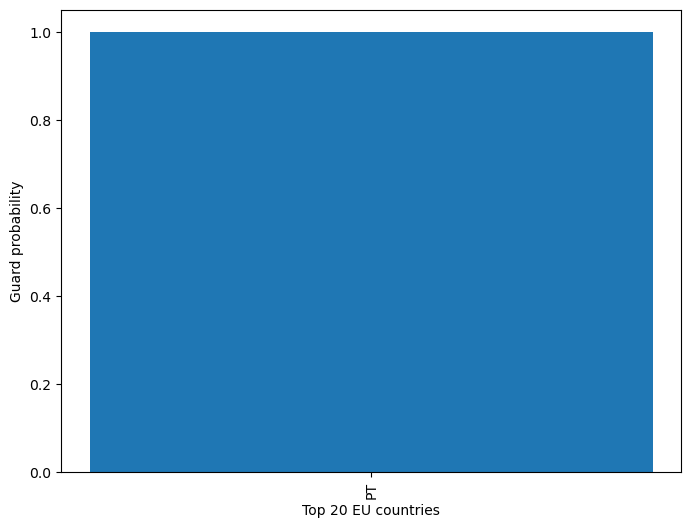

In [15]:
def plot_guard_probability_per_eu_country():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(eu_country_codes_count.keys())
    total = sum(country_codes_count.values())
    lengths = [(s/total) for s in eu_country_codes_count.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} EU countries')
    plt.ylabel('Guard probability')

    # Display the plot
    plt.show()

plot_guard_probability_per_eu_country()

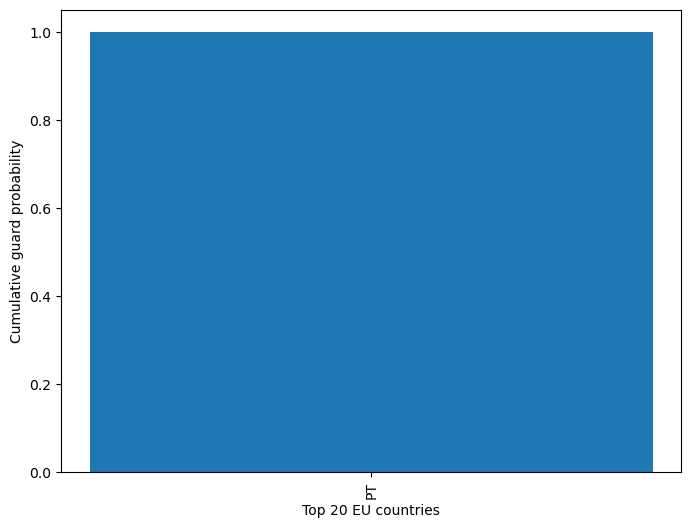

In [16]:
def plot_cumulative_guard_probability_per_eu_country():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(eu_country_codes_count.keys())
    total = sum(country_codes_count.values())
    lengths = [(s/total) for s in eu_country_codes_count.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Extract sorted keys from the sorted combined list
    sorted_keys = [item[0] for item in combined]
    sorted_lengths = [item[1] for item in combined]
    # Calculate cumulative probabilities
    cumulative_lengths = [sum(sorted_lengths[:i+1]) for i in range(len(sorted_lengths))]

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], cumulative_lengths[:n_els_to_show])

    plt.xticks(rotation=90)

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} EU countries')
    plt.ylabel('Cumulative guard probability')

    # Display the plot
    plt.show()

plot_cumulative_guard_probability_per_eu_country()

In [17]:
ases_per_country = {}

def get_ases_per_country():
    for key, value in guard_nodes.items():
        as_name = value["as"]
        country_code = value["country_code"]
        if country_code not in ases_per_country:
            ases_per_country[country_code] = set()
        ases_per_country[country_code].add(as_name)

In [18]:
isps_per_country = {}

def get_isps_per_country():
    for key, value in guard_nodes.items():
        isp = value["isp"]
        country_code = value["country_code"]
        if country_code not in isps_per_country:
            isps_per_country[country_code] = set()
        isps_per_country[country_code].add(isp)


In [19]:
get_ases_per_country()
get_isps_per_country()

print("ases_per_country", ases_per_country)
print("isps_per_country", isps_per_country)

ases_per_country {'PT': {'AS16276 OVH SAS'}}
isps_per_country {'PT': {'OVH ISP'}}


### Plot Ases per country
* This was still not done in our appendix

sorted_lengths (1,)


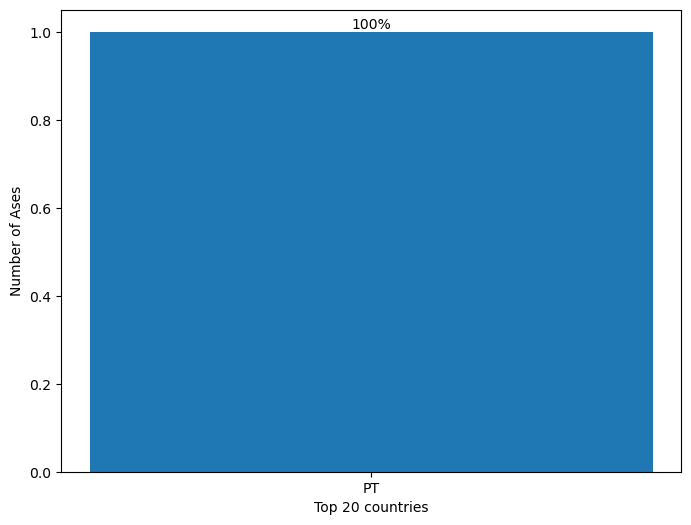

In [20]:
def plot_ases_per_country():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(ases_per_country.keys())
    lengths = [len(s) for s in ases_per_country.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)
    print("sorted_lengths", sorted_lengths)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    # Add annotations (frequencies) on top of each bar
    for i, length in enumerate(sorted_lengths[:n_els_to_show]):
        plt.text(i, length, "{:.0%}".format(length / sum(lengths)), ha='center', va='bottom')

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} countries')
    plt.ylabel('Number of Ases')

    # Display the plot
    plt.show()

plot_ases_per_country()

### Plot ISPs per country

sorted_lengths (1,)


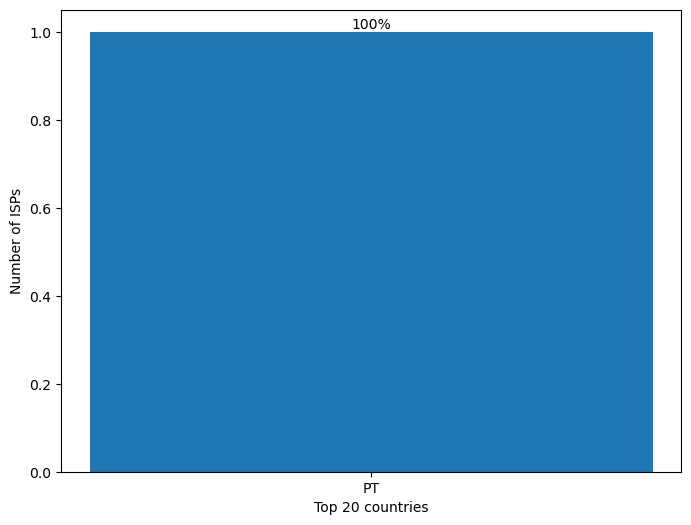

In [21]:
def plot_isps_per_country():
    plt.figure(figsize=(8, 6))  # Width: 8 inches, Height: 6 inches
    
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(isps_per_country.keys())
    lengths = [len(s) for s in isps_per_country.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)
    print("sorted_lengths", sorted_lengths)

    # Create a bar plot
    plt.bar(sorted_keys[:n_els_to_show], sorted_lengths[:n_els_to_show])

    # Add annotations (frequencies) on top of each bar
    for i, length in enumerate(sorted_lengths[:n_els_to_show]):
        plt.text(i, length, "{:.0%}".format(length / sum(lengths)), ha='center', va='bottom')

    # Add labels and title
    plt.xlabel(f'Top {n_els_to_show} countries')
    plt.ylabel('Number of ISPs')

    # Display the plot
    plt.show()

plot_isps_per_country()

### Some conclusions about colluding ASes and ISPs
Even though most of the ASes intercepting Tor guard node's traffic (atleast 46) are under US jurisdiction, atleast 29 ASes are under Germany's (DE) jurisdiction. But Germany's ASes alone handle around 30% Tor guard traffic, surpassing US's 22% Tor guard traffic coverage. Atleast 12 ASes are under France's (FR) jurisdiction, which alone intercept almost 10% of Tor's guard traffic. Next, atleast 3 ASes are under Finland's (FI) jurisdiction, which intercept around 7% of all Tor guard traffic. Next, atleast 17 ASes are under the Netherlands' (NL) jurisdiction, which intercept around 4% of all Tor guard traffic. 
The top four EU countries with higher guard coverage sum up to 30%+10%+7%+4%=51%, over half the total Tor guard traffic coverage, which would require the cooperation of atleast 29+12+3+17=61 ASes. Another cooperation scenario would be to combine Germany's and US's coverage, which would total up to 30%+22%=52%, which would also be over half the total Tor guard traffic coverage.

In terms of ISPs, the US covers atleast 55, Germany covers atleast 43, France covers atleast 16, Finland covers atleast 3, and Netherlands covers atleast 24. This means that we would need the cooperation of either 43+16+3+24=86 ISPs, or 43+55=98 ISPs to get over half the total Tor guard traffic coverage.

From our experiments, we can deploy the attack successfully having only half of the guard traffic coverage, or even less. As we can see from the following figure, having reduced coverage does not change the overall trend of our classifier's performance. This figure was taken by choosing random traces from both the client and the OS-side corresponding to the intended coverage, and performing correlation on the remaining traces. Since it was random, we took three results to show that changing the covered traces does not impact the results.

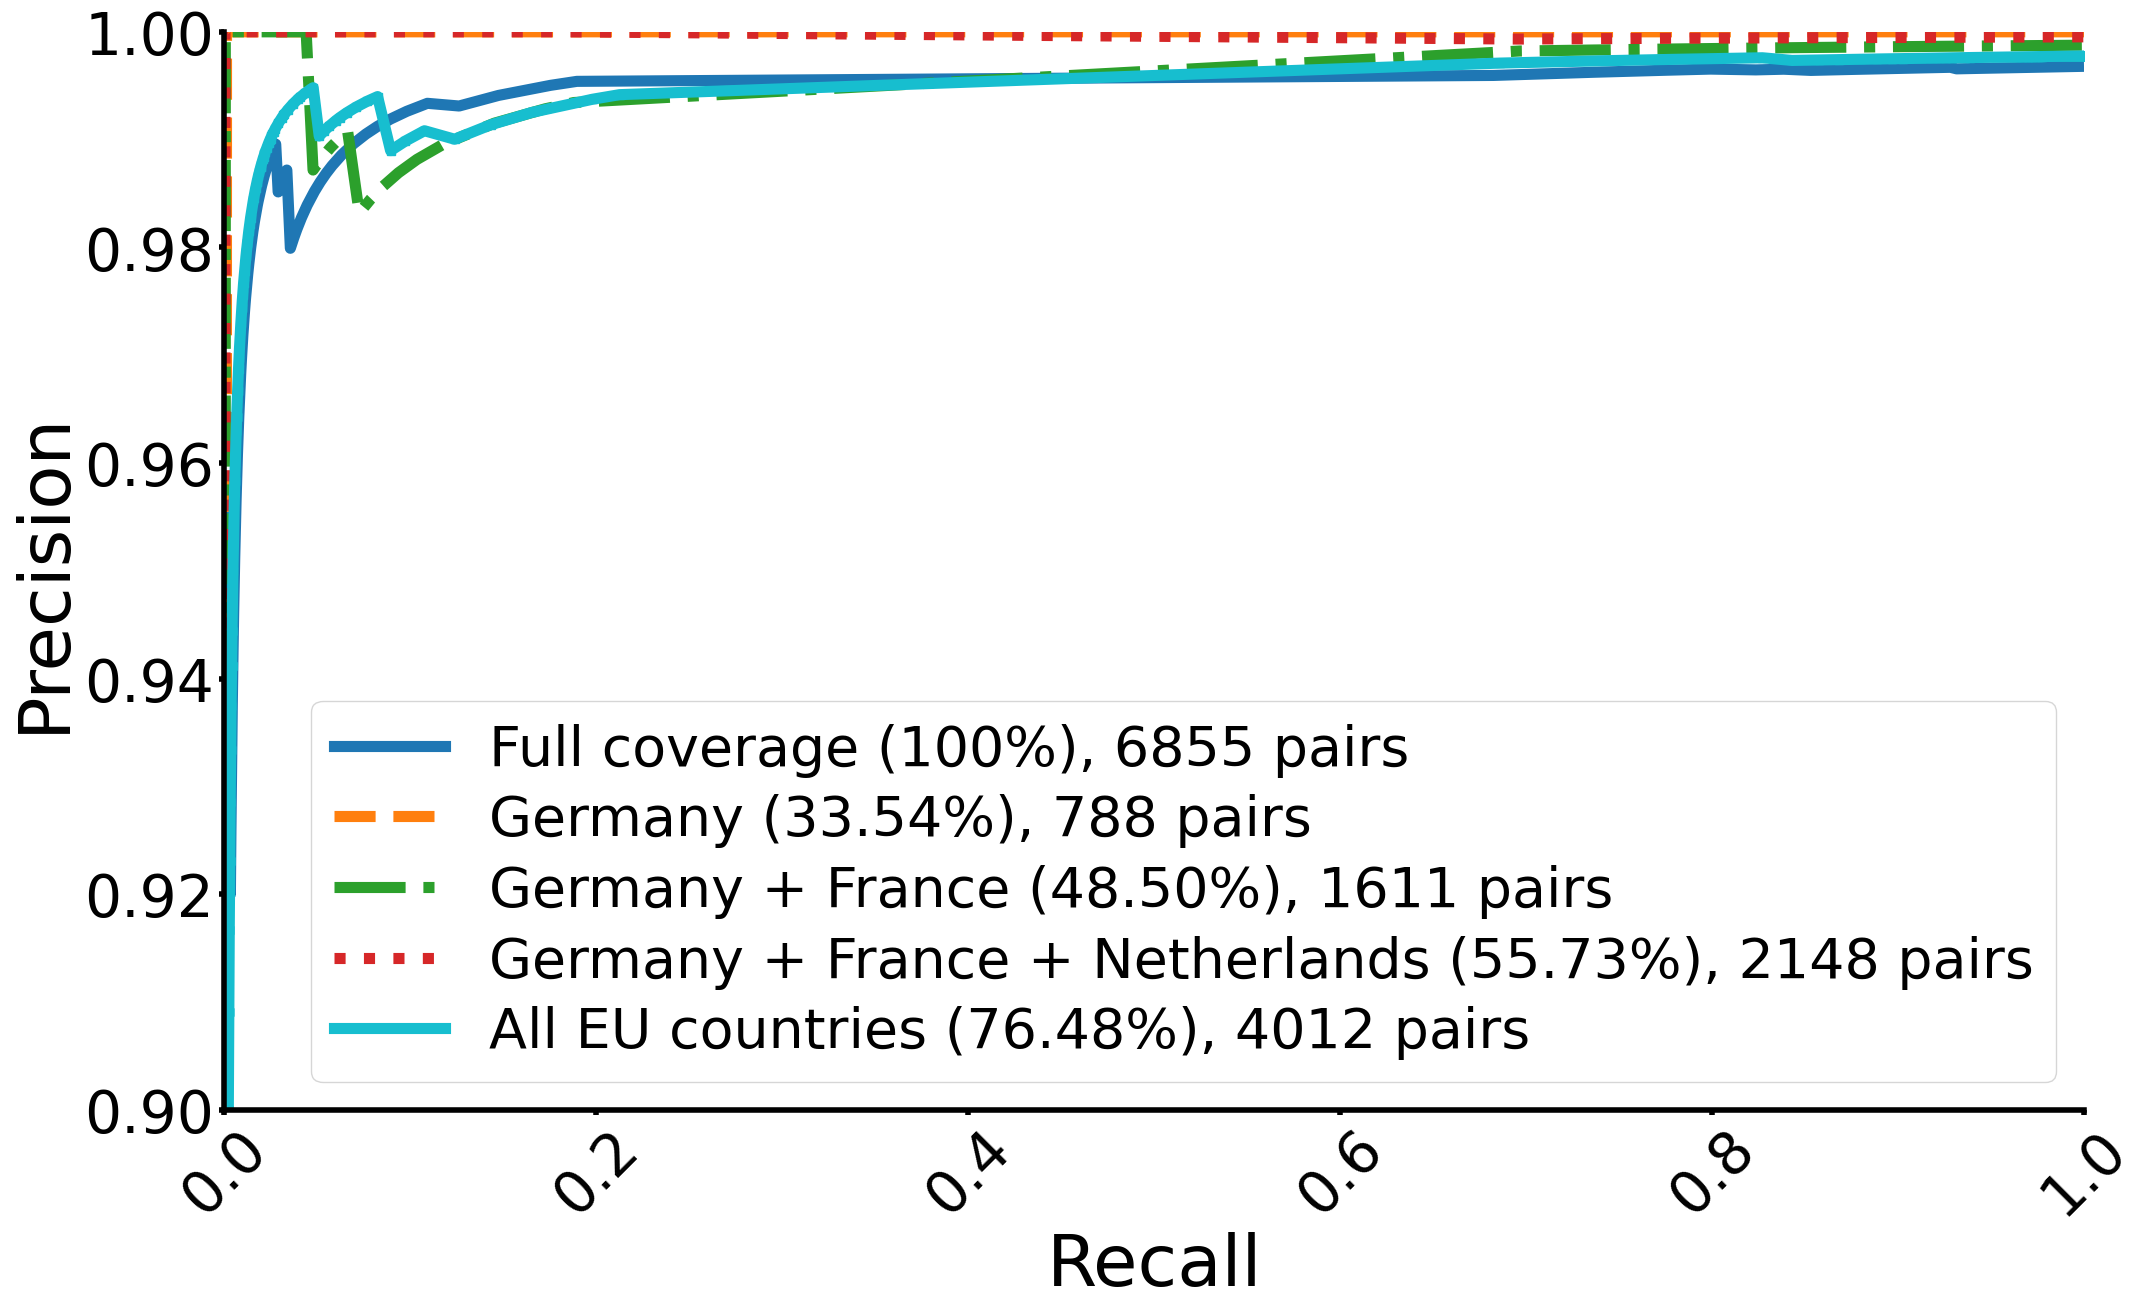

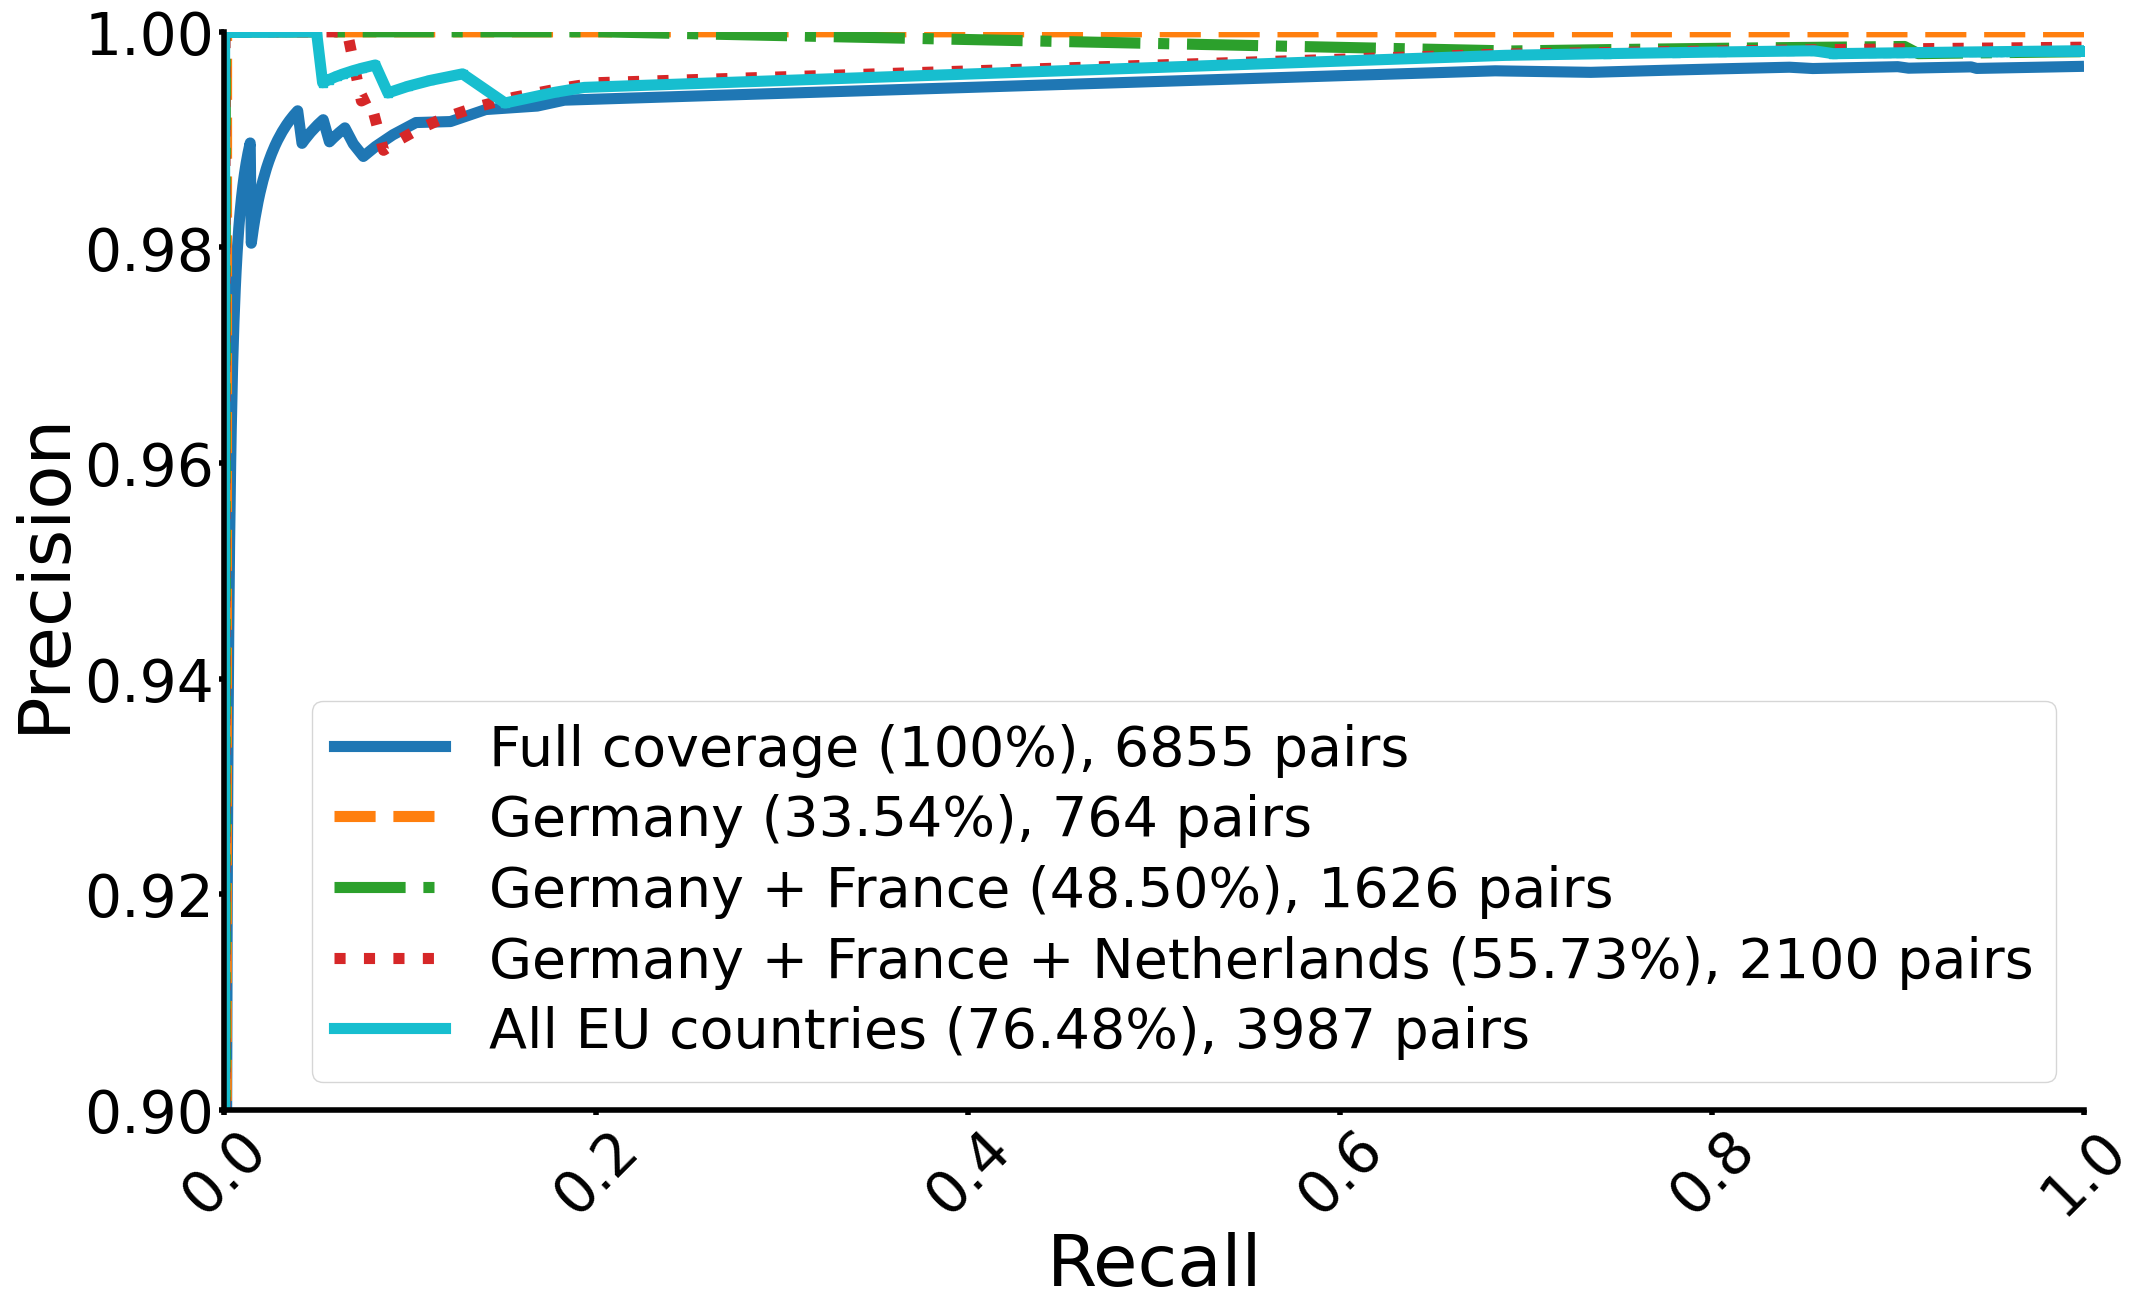

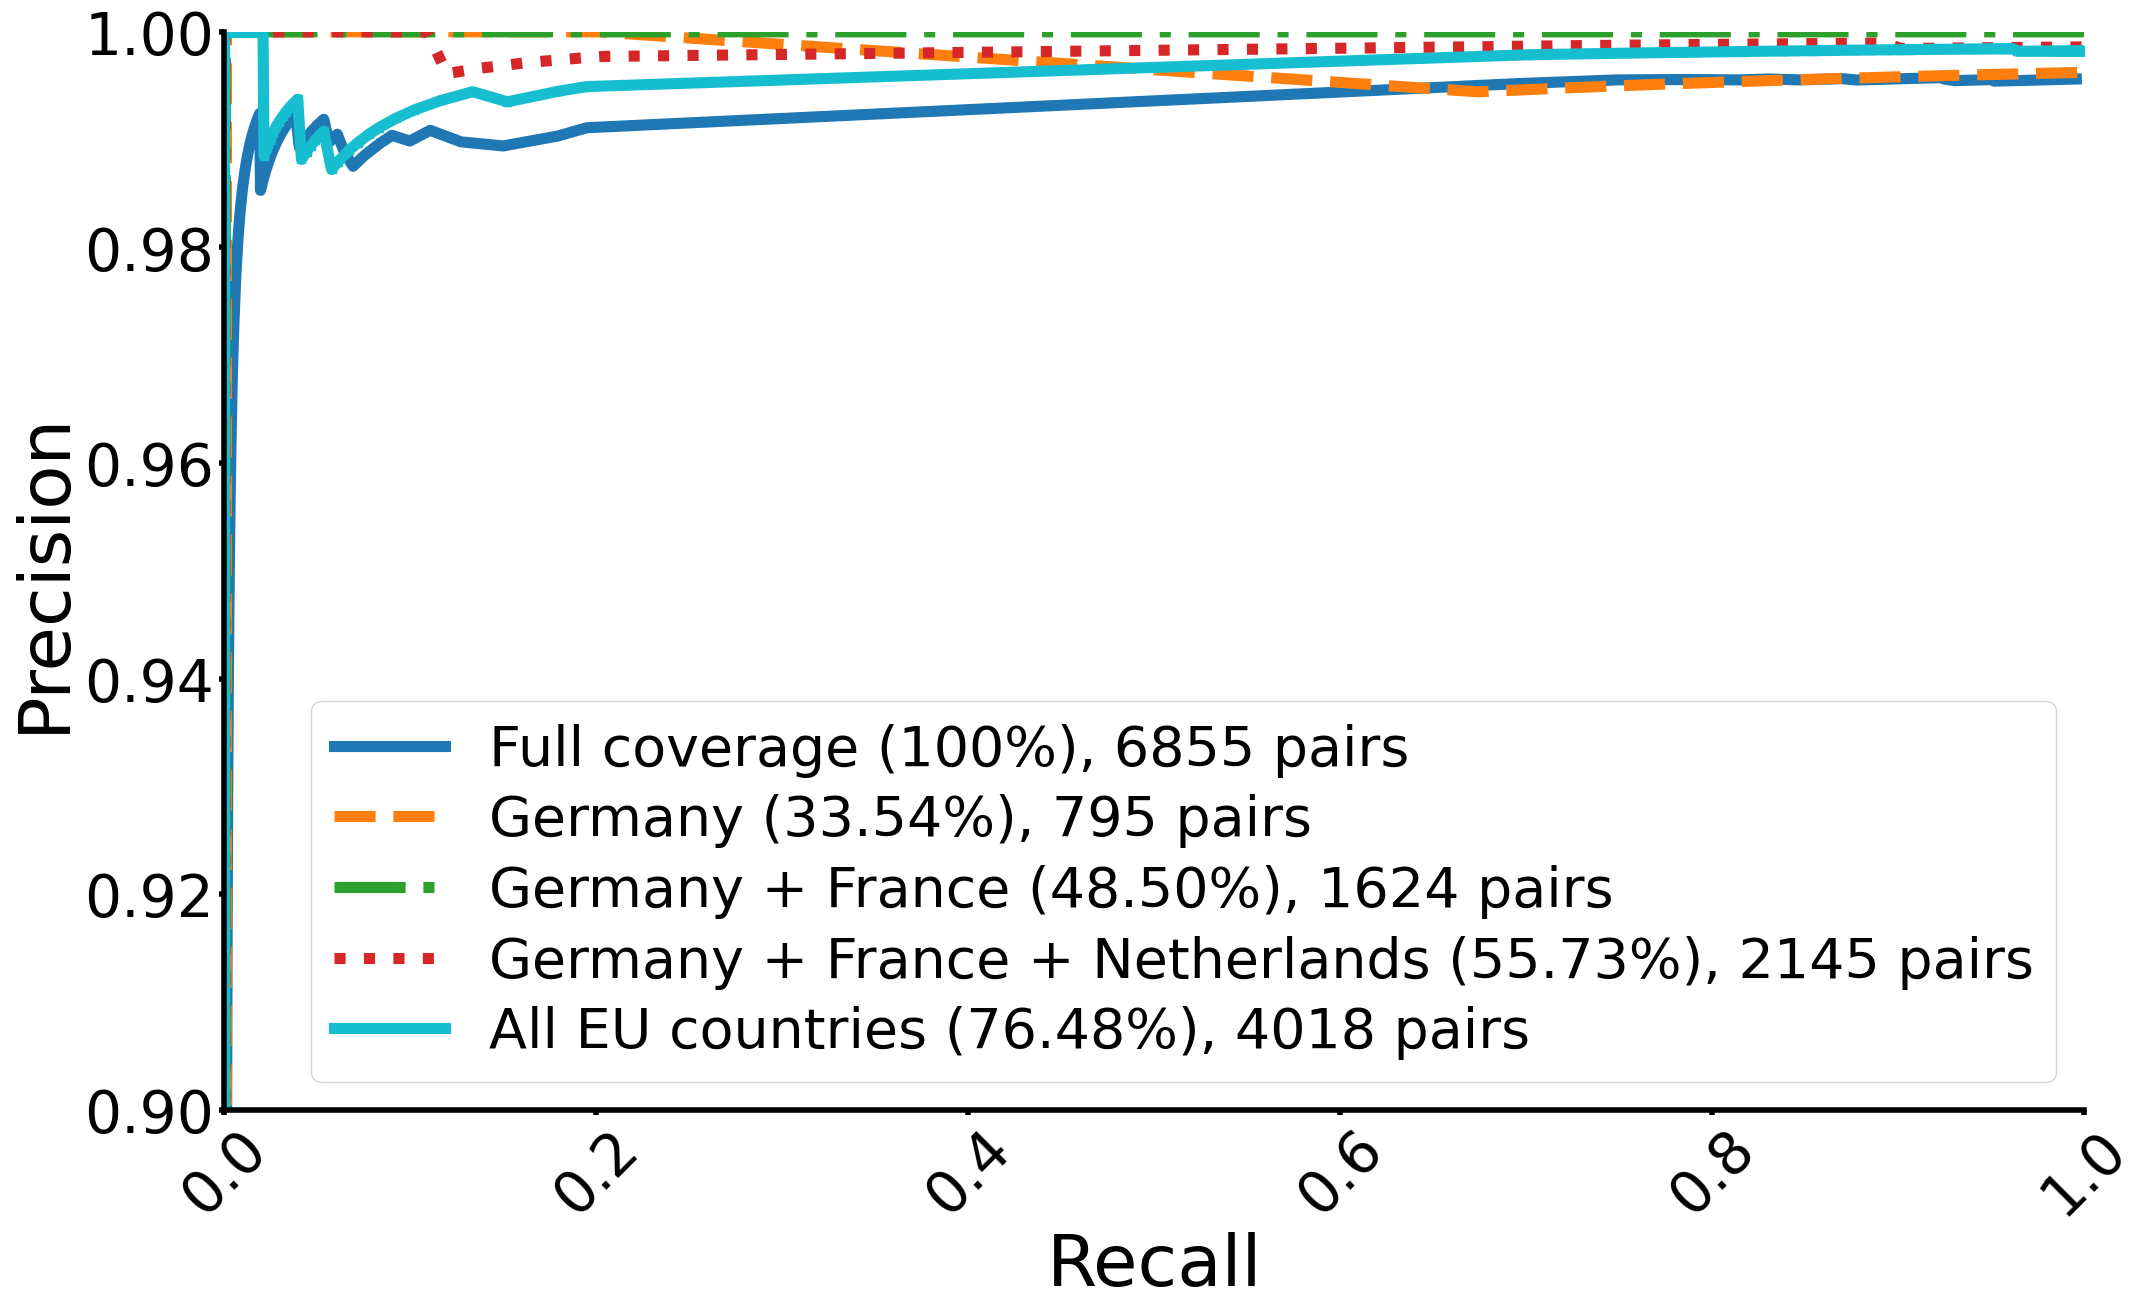

TODO: Full coverage trace should always have the same values, check why they are not exactly the same across the three plots

In [22]:
def print_table_countries_coverage_as_isp():
    data = []
    for country, guard_probability in top_country_guard_probabilities.items():
        data.append([country, guard_probability, len(ases_per_country[country]), len(isps_per_country[country])])

    table = tabulate(data, headers=['Country', 'Guard Probability', 'ASes', 'ISPs'], tablefmt='grid')

    print(table)

print_table_countries_coverage_as_isp()

+-----------+---------------------+--------+--------+
| Country   |   Guard Probability |   ASes |   ISPs |
+===========+=====================+========+========+
| PT        |                   1 |      1 |      1 |
+-----------+---------------------+--------+--------+


#### ASes coverage

In [23]:
top_ases_countries = {}

def get_top_ases_countries():
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(ases_count.keys())
    total = sum(ases_count.values())
    lengths = [(s/total) for s in ases_count.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    top_keys = sorted_keys[:n_els_to_show]
    for as_name in top_keys:
        top_ases_countries[as_name] = ases_countries[as_name]

get_top_ases_countries()

In [24]:
def print_table_as_country():
    data = []
    for as_name, country in top_ases_countries.items():
        data.append([as_name, country, as_guard_probabilities[as_name]])

    table = tabulate(data, headers=['AS', 'Country', 'Guard Probability'], tablefmt='grid')

    print(table)

print_table_as_country()

+-----------------+-----------+---------------------+
| AS              | Country   |   Guard Probability |
+=================+===========+=====================+
| AS16276 OVH SAS | {'PT'}    |                   1 |
+-----------------+-----------+---------------------+


The top 3 ASes with highest guard traffic coverage observe 19.5%+15%+5.3%=39.8%, and they are all capture Germany's traffic. According to our previous plots, considering Germany has 33.54% guard traffic coverage, our classifier maintains its performance, which can indicate that having the three top ASes colluding would be sufficient to launch our attack successfully.

#### ISPs coverage

In [25]:
top_isps_countries = {}

def get_top_isps_countries():
    n_els_to_show = 20

    # Extract keys and lengths
    keys = list(isps_count.keys())
    total = sum(isps_count.values())
    lengths = [(s/total) for s in isps_count.values()]

    # Combine keys and lengths using zip
    combined = list(zip(keys, lengths))
    # Sort the combined list based on lengths in descending order
    combined.sort(key=lambda x: x[1], reverse=True)
    # Unzip the sorted list back into separate lists
    sorted_keys, sorted_lengths = zip(*combined)

    top_keys = sorted_keys[:n_els_to_show]
    for isp in top_keys:
        top_isps_countries[isp] = isps_countries[isp]

get_top_isps_countries()

In [26]:
def print_table_isp_country():
    data = []
    for isp, country in top_isps_countries.items():
        data.append([isp, country, isp_guard_probabilities[isp]])

    table = tabulate(data, headers=['ISP', 'Country', 'Guard Probability'], tablefmt='grid')

    print(table)

print_table_isp_country()

+---------+-----------+---------------------+
| ISP     | Country   |   Guard Probability |
+=========+===========+=====================+
| OVH ISP | {'PT'}    |                   1 |
+---------+-----------+---------------------+


Even if we consider ISPs, the top three ISPs with highest Tor guard traffic coverage sum up to 16.7%+14.5%+5.3%=36.5%. So, only three colluding ISPs would be sufficient to launch our attack effectively.

# TODOs
* I can calculate the conditional probability of choosing a guard node in the same country when establishing 2 circuits (simulating a client and an onion service circuit)